In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
insur_data=pd.read_csv('/content/insurance.csv')

In [3]:
insur_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Checking null values
insur_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
insur_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


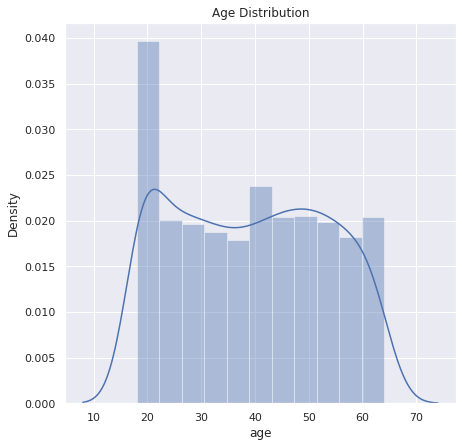

In [13]:
sns.set()
plt.figure(figsize=(7,7))
sns.distplot(insur_data['age'])
plt.title('Age Distribution')
plt.show()

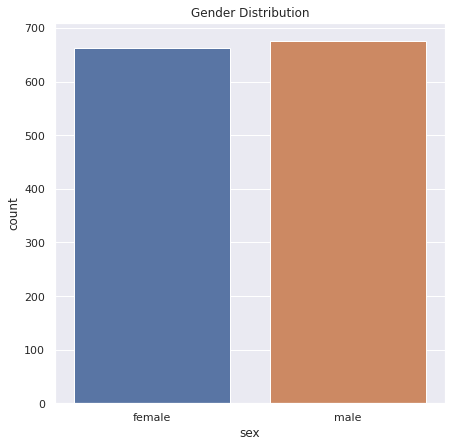

In [15]:
plt.figure(figsize=(7,7))
sns.countplot(x='sex',data=insur_data)
plt.title('Gender Distribution')
plt.show()

In [20]:
insur_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


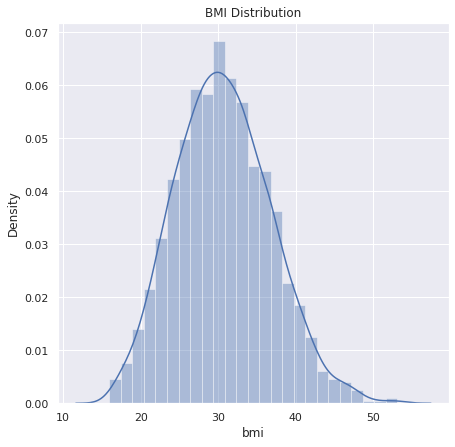

In [16]:
plt.figure(figsize=(7,7))
sns.distplot(insur_data['bmi'])
plt.title('BMI Distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


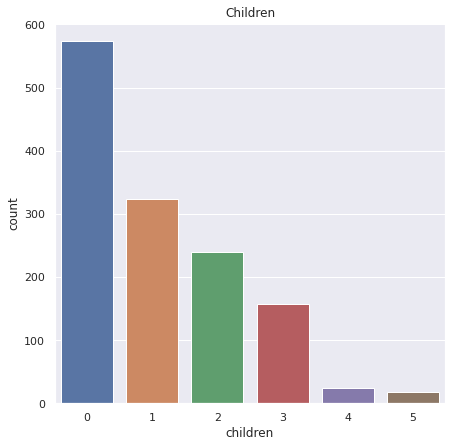

In [17]:
plt.figure(figsize=(7,7))
sns.countplot(insur_data['children'])
plt.title('Children')
plt.show()

In [19]:
insur_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


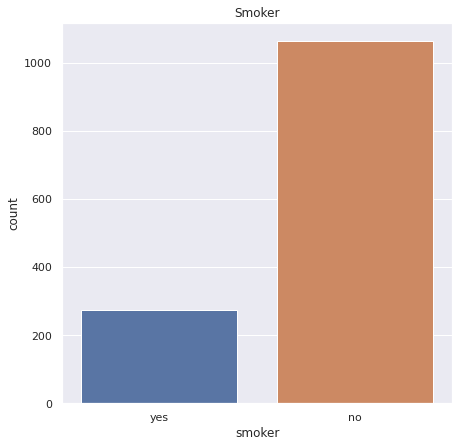

In [21]:
plt.figure(figsize=(7,7))
sns.countplot(insur_data['smoker'])
plt.title('Smoker')
plt.show()

In [22]:
insur_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


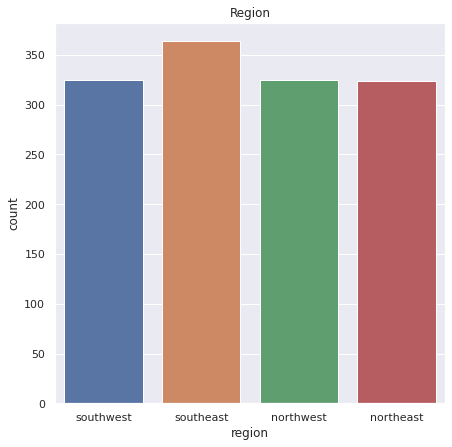

In [23]:
plt.figure(figsize=(7,7))
sns.countplot(insur_data['region'])
plt.title('Region')
plt.show()

In [24]:
insur_data['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


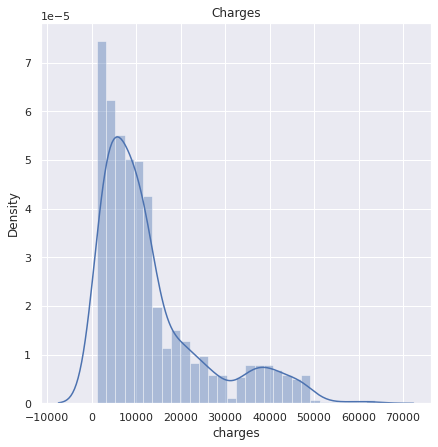

In [25]:
plt.figure(figsize=(7,7))
sns.distplot(insur_data['charges'])
plt.title('Charges')
plt.show()

In [30]:
#Data Encoding
insur_data.replace({'sex':{'male':0,'female':1}},inplace=True)
insur_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
insur_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [32]:
features=insur_data.drop('charges',axis=1)
target=insur_data['charges']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=1)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lr=LinearRegression()

In [37]:
pred=lr.fit(x_train,y_train).predict(x_test)

In [38]:
from sklearn import metrics

In [39]:
metrics.r2_score(y_test,pred)

0.7618294350214682

Building a predictive system

In [44]:
input_data=(19,1,27.9,0,0,1)
input_data_array=np.asarray(input_data)
input_data_reshape=input_data_array.reshape(1,-1)
prediction=lr.predict(input_data_reshape)
print(prediction)

[25659.71975262]
